In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 設定 data_path
dir_data = './data/'

In [ ]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [ ]:

# 沿縱軸合併
result = pd.concat([df1, df2, df3])
result

In [ ]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
result

In [ ]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1, join = 'inner') # join = 'inner' 重複的concat
print(result)

In [ ]:
result = pd.merge(df1, df4, how='inner')
print(result)

In [ ]:
# 將 欄-列 逐一解開
print(df1)
df1.melt()

In [ ]:

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 取 TARGET 為 1 的
sub_df = app_train[app_train['TARGET'] == 1]
sub_df.head()

In [ ]:
# 取 AMT_INCOME_TOTAL 大於平均資料中，SK_ID_CURR, TARGET 兩欄
sub_df = app_train.loc[app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].mean(), 'SK_ID_CURR':'TARGET']
sub_df.head()

In [ ]:
app_train.groupby(['NAME_CONTRACT_TYPE']).size()

In [ ]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].describe()

In [ ]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()

In [ ]:
app_train.loc[0:10000, ['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'].apply(lambda x: x / x.mean())

app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].hist()
plt.show()

## app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP

0 個小孩
有 1 - 2 個小孩
有 3 - 5 個小孩
有超過 5 個小孩

In [6]:
#1
"""
Your code here
cut function 參考：https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html
"""
# bins 切割的區隔
# cut_rule = pd.IntervalIndex.from_tuples([(-1, 0), (0, 2), (2, 5), (5,app_train['CNT_CHILDREN'].max())])
cut_rule = [-np.inf, 0, 2, 5, np.inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, bins = cut_rule, 
                                         include_lowest = True, labels = ['0', '1-2', '3-5', '>5'])
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1-2     87868
3-5      4230
>5         42
Name: CNT_CHILDREN_GROUP, dtype: int64

##  根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTA

In [7]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1-2                 0         174590.584401
                    1         176115.362720
3-5                 0         175053.742913
                    1         160677.385714
>5                  0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

箱形圖,是一種用作顯示一組數據分散情況資料的統計圖,它能顯示出一組數據的最大值、最小值、中位數、及上下四分位數

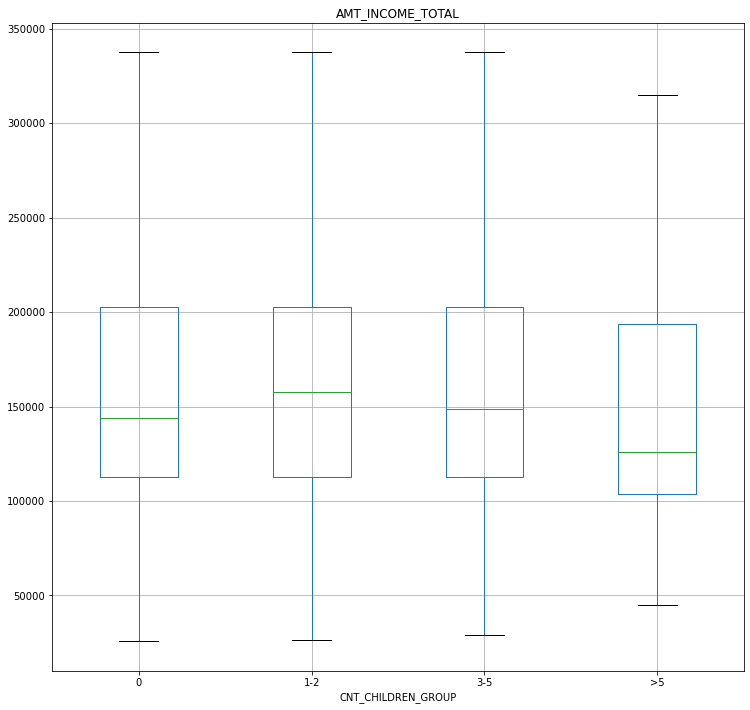

In [8]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

## 根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [12]:
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean()) / x.std())

print(app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head())
grouped_df.mean()

   AMT_INCOME_TOTAL  AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0          202500.0                                   0.491521
1          270000.0                                   0.972434
2           67500.0                                  -0.934706
3          135000.0                                  -0.298993
4          121500.0                                  -0.426135


CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1-2                 0         174590.584401
                    1         176115.362720
3-5                 0         175053.742913
                    1         160677.385714
>5                  0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

# z轉換: (x - x.mean()) / x.std()